In [ ]:
#IMPORT THE LIBRARY

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# LOAD THE DATASET

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# CHECK THE SHAPE

x_train.shape

(60000, 28, 28)

In [ ]:
# CHECK A SINGLE IMAGE DATA

single_image=x_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
single_image.shape

(28, 28)

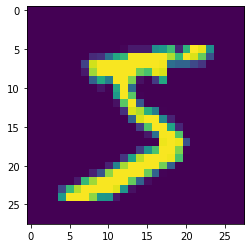

In [ ]:
# SEE THE IMAGE

plt.imshow(single_image)

In [ ]:
# CONVERT THE Y VALUES INTO ONEHOTENCODER

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# CHECK SINGLE VALUE

y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

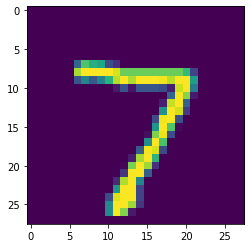

In [ ]:
plt.imshow(x_test[0])

In [ ]:
# CHECK THE SHAPE

y_cat_train.shape

(60000, 10)

In [ ]:
# MIN-MAX SCALING ON X_TRAIN AND X_TEST DATA

x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[0].max()

1.0

In [ ]:
x_train[0].min()

0.0

In [ ]:
# Reshape to include channel dimension (in this case, 1 channel)


x_train = x_train.reshape(60000, 28, 28, 1)
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
# CREATE AND TRAIN THE MODEL


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
model=Sequential()

#CONVOLUTIONAL LAYER 1

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))

#CONVOLUTIONAL LAYER 2

model.add(Conv2D(filters=35, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))


# POOLING LAYER 1

model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))



# POOLING LAYER 2

model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))


# Flatten the input

model.add(Flatten())


# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)

model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))


# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)

model.add(Dense(75, activation='relu'))
model.add(Dropout(.5))


# OP LAYER

model.add(Dense(10,activation='softmax'))


model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# FIT THE MODEL INTO THE DATASET

model.fit(x_train,y_cat_train,epochs=250,batch_size=128,validation_data=(x_test,y_cat_test),callbacks=[earlystopper])

Epoch 1/250
469/469 [==============================] - 178s 380ms/step - loss: 0.3974 - accuracy: 0.8755 - val_loss: 0.0541 - val_accuracy: 0.9841
Epoch 2/250
469/469 [==============================] - 178s 380ms/step - loss: 0.1343 - accuracy: 0.9637 - val_loss: 0.0371 - val_accuracy: 0.9901
Epoch 3/250
469/469 [==============================] - 179s 382ms/step - loss: 0.0980 - accuracy: 0.9741 - val_loss: 0.0315 - val_accuracy: 0.9909
Epoch 4/250
469/469 [==============================] - 176s 376ms/step - loss: 0.0828 - accuracy: 0.9779 - val_loss: 0.0399 - val_accuracy: 0.9899
Epoch 5/250
469/469 [==============================] - 177s 377ms/step - loss: 0.0704 - accuracy: 0.9814 - val_loss: 0.0252 - val_accuracy: 0.9939
Epoch 6/250
469/469 [==============================] - 177s 377ms/step - loss: 0.0630 - accuracy: 0.9831 - val_loss: 0.0289 - val_accuracy: 0.9923
Epoch 7/250
469/469 [==============================] - 176s 376ms/step - loss: 0.0530 - accuracy: 0.9865 - val_loss: 0

In [ ]:
# KEEP TRACK OF THE METRICES IN EACH EPOCHS

pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.397353,0.875467,0.054128,0.9841
1,0.134287,0.963733,0.037079,0.9901
2,0.098005,0.974100,0.031521,0.9909
3,0.082845,0.977850,0.039880,0.9899
4,0.070446,0.981383,0.025158,0.9939
5,0.062982,0.983117,0.028859,0.9923
6,0.052976,0.986517,0.034939,0.9910


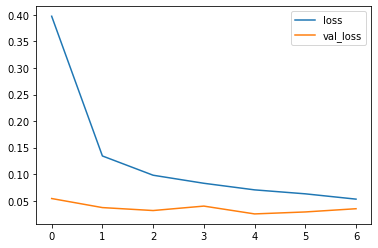

In [ ]:
# PLOT THE TRACK OF LOSS AND VALIDATION LOSS

pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

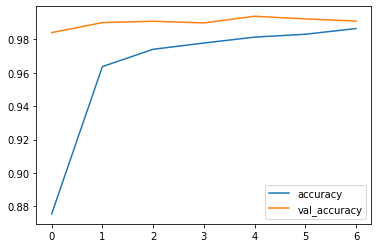

In [ ]:
#PLOT THE TRACK OF ACCURACY AND VALIDATION ACCURACY

pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()

In [ ]:
# MAKE PREDICTIONS WITH THE MODEL


predictions=model.predict_classes(x_test)
predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
#EVALUATE THE MODEL

print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.03493859991431236, 0.9909999966621399]


In [ ]:
#CHECK THE ERROR METRICES

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print('________________________________________________')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.97      1.00      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

________________________________________________
[[ 978    0    1    0    0    0    0    1    0    0]
 [   0 1123    2    2    0    5    1    2    0    0]
 [   0    0 1030    0    0    0    0    2    0    0]
 [   0    0    3  997    0    8  

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
      f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


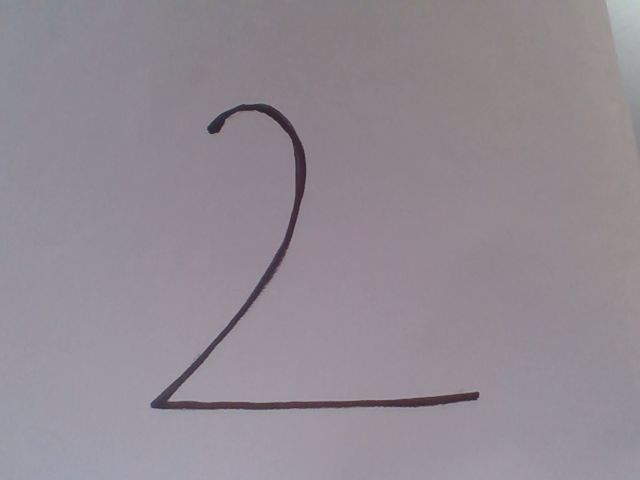

In [ ]:
# OPEN THE WEBCAM AND CAPTURE THE IMAGE AND SAVE IT WITH THE NAME PHOTO.JPG

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

307200


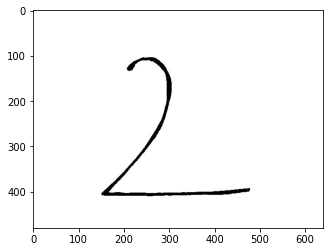

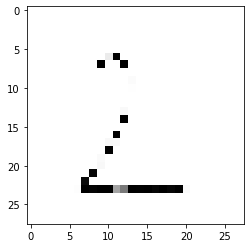

the output will be : [2]


In [ ]:
# TAKE THE IMAGE
# CONVERT IT INTO GRAYSCALE IMAGE
# RESHAPE IT INTO (1,28,28,1) TO FFED THE DATA INTO OUR DL MODEL
from PIL import Image
import cv2
user_test = filename
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test =new_array/255
#user_test=user_test.reshape(1,28,28,1)
predicted = model.predict_classes(user_test.reshape(1,28,28,1))
print('the output will be :',predicted)

In [ ]:
user_test.shape

(28, 28)

In [ ]:
user_test.reshape(1,28,28,1)

array([[[[1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.55686275],
         [1.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [1.        ],
         [0.        ],
         [0.        ],
         [0.4627451 ],
         [0.        ],
         [0.        ],
         [0.99607843]],

        [[1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         